In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download('MSFT',start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,40.184547,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.452740,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.080738,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.492462,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.994221,29114100
...,...,...,...,...,...,...
2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300
2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22234100


In [4]:
def RSI(data, window=30):
    delta=data['Close'].diff()
    gain=delta.where(delta >0,0)
    loss=delta.where(delta <0,0)
    avg_gain=gain.rolling(window=window).mean()
    avg_loss=abs(loss.rolling(window=window).mean())
    RS=avg_gain/avg_loss
    RSI=100-(100/(1+RS))
    data['RSI']=RSI

In [5]:
RSI(df)
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-02-12,42.660000,43.090000,42.509998,43.090000,37.277771,33268800,41.532252
2015-02-13,43.380001,43.869999,43.150002,43.869999,37.952553,40264900,43.743930
2015-02-17,43.970001,44.000000,43.189999,43.580002,37.969997,33695700,42.281557
2015-02-18,43.630001,43.700001,43.389999,43.529999,37.926422,27111700,43.076152
2015-02-19,43.180000,43.529999,43.049999,43.500000,37.900288,27603400,44.506892
...,...,...,...,...,...,...,...
2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700,55.837370
2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300,56.750639
2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22234100,59.287297


In [6]:
df['RSI'].max()

90.29471597668511

In [7]:
df['RSI'].min()

19.80951535163851

In [8]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[tmp_max_i], tmp_max+tmp_max*0.001]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[tmp_min_i], tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [9]:
tops, bottoms = directional_change(df['RSI'].to_numpy(), df['RSI'].to_numpy(),df.index.to_numpy(),df['RSI'].to_numpy(), 0.01)
len(tops)

509

In [10]:
df['RSI']

Date
2015-02-12    41.532252
2015-02-13    43.743930
2015-02-17    42.281557
2015-02-18    43.076152
2015-02-19    44.506892
                ...    
2024-01-12    55.837370
2024-01-16    56.750639
2024-01-17    59.287297
2024-01-18    65.539751
2024-01-19    66.143961
Name: RSI, Length: 2249, dtype: float64

In [11]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')
tp

,Date,Price
Date,,
2015-02-13,2015-02-13,43.787674
2015-02-19,2015-02-19,44.551399
2015-03-02,2015-03-02,45.237504
2015-03-05,2015-03-05,41.330818
2015-03-09,2015-03-09,36.597692
...,...,...
2023-12-22,2023-12-22,56.607806
2023-12-27,2023-12-27,53.955289
2023-12-29,2023-12-29,53.497052


In [12]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [13]:
bt

,Date,Price
Date,,
2015-02-17,2015-02-17,42.239275
2015-02-23,2015-02-23,40.55022
2015-03-04,2015-03-04,39.899643
2015-03-06,2015-03-06,34.745047
2015-03-10,2015-03-10,35.108048
...,...,...
2023-12-26,2023-12-26,52.516674
2023-12-28,2023-12-28,52.660384
2024-01-02,2024-01-02,47.045924


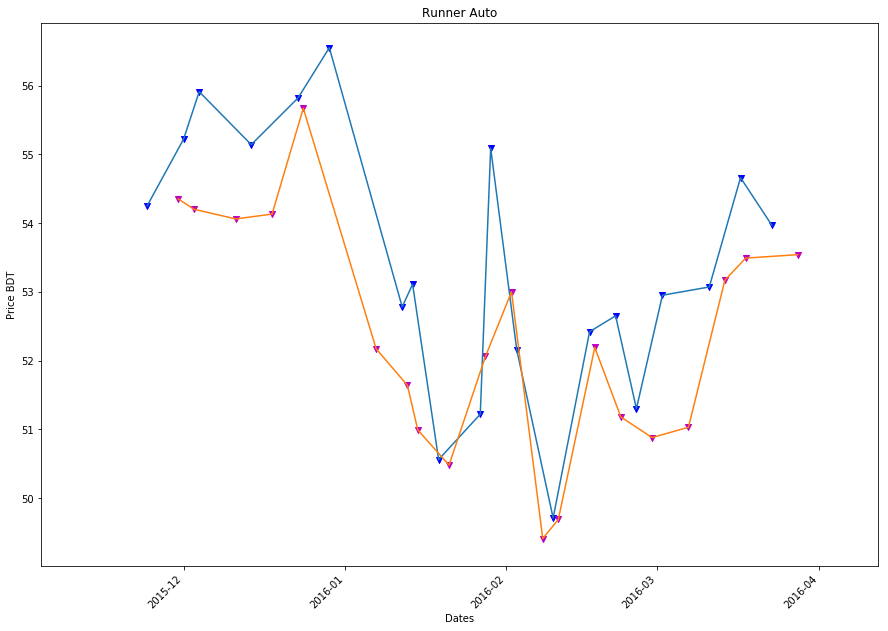

In [14]:
#df1=df[:50]

plt.figure(figsize=(15,10))
plt.scatter(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values),color='b',marker='v')
plt.scatter(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values),color='m',marker='v')
plt.plot(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values))
plt.plot(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values))

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()